In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv("uber.csv")

In [205]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [206]:
df = df.drop("Unnamed: 0", axis=1)

In [207]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [209]:
df[df["dropoff_latitude"].isnull()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [210]:
df = df.drop(index=87946, axis=0)

In [211]:
df[df["dropoff_latitude"].isnull()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [213]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [214]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [215]:
df = df.drop("key", axis=1)

In [216]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [217]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [218]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [220]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0: Mon, 6: Sun


df['hour_numeric'] = df['pickup_datetime'].dt.hour + (df['pickup_datetime'].dt.minute / 60) + (df['pickup_datetime'].dt.second / 3600)



In [221]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333


In [222]:
df[df["passenger_count"]>10]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
113038,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,28,1,8.333333


In [223]:
df = df.drop(113038, axis=0)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

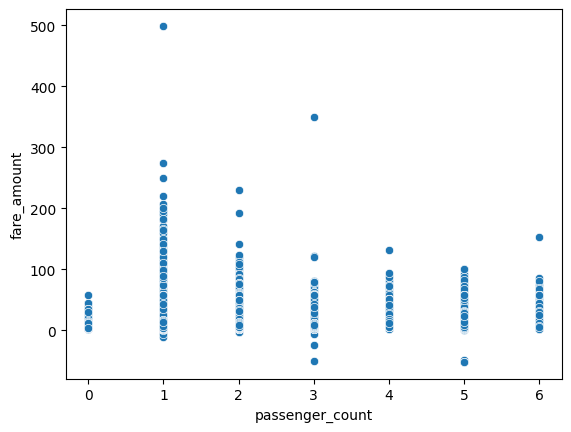

In [224]:
sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"])

In [225]:
df["passenger_count"].median()

np.float64(1.0)

In [226]:
df[df["passenger_count"] ==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
333,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,5,4,7.052222
908,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,6,1,12.421944
926,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,26,0,18.190000
2000,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,20,4,15.132500
3011,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,7,5,19.318889
...,...,...,...,...,...,...,...,...,...,...,...,...
196797,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,17,0,15.873889
197103,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0,2011,12,10,5,15.553333
198872,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,20,1,19.918056
198902,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,22,0,21.182222


In [227]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333


In [228]:
columns = ["fare_amount", "pickup_datetime", "pickup_longitude", "pickup_latitude", 
           "dropoff_longitude", "dropoff_latitude", "passenger_count", 
           "year", "month", "day", "day_of_week", "hour_numeric"]

# Sadece sayısal ve zaman özelliklerini kontrol etmek daha mantıklıdır.
# 'pickup_datetime', 'longitude', 'latitude' gibi kolonların benzersiz değeri on binlerce olacaktır.
# Bu yüzden onları kontrol listesinden çıkarabiliriz, ancak kodu genel tutalım.

for i in columns:
    # Benzersiz değer sayısı 10'dan az mı?
    if df[i].nunique() < 20: 
        print("-------------------------------------------------------")
        print(f"Sütun Adı: {i}")
        print(f"Benzersiz Değer Sayısı: {df[i].nunique()}")
        print("Benzersiz Değerler:")
        print(df[i].unique())
        print("-------------------------------------------------------")

-------------------------------------------------------
Sütun Adı: passenger_count
Benzersiz Değer Sayısı: 7
Benzersiz Değerler:
[1 3 5 2 4 6 0]
-------------------------------------------------------
-------------------------------------------------------
Sütun Adı: year
Benzersiz Değer Sayısı: 7
Benzersiz Değerler:
[2015 2009 2014 2011 2012 2010 2013]
-------------------------------------------------------
-------------------------------------------------------
Sütun Adı: month
Benzersiz Değer Sayısı: 12
Benzersiz Değerler:
[ 5  7  8  6  2 10 12  3  4  9 11  1]
-------------------------------------------------------
-------------------------------------------------------
Sütun Adı: day_of_week
Benzersiz Değer Sayısı: 7
Benzersiz Değerler:
[3 4 0 5 6 1 2]
-------------------------------------------------------


In [229]:
# Sadece yolcu sayısı 0'dan büyük olan satırları seç ve df'i güncelle.
df = df[df['passenger_count'] > 0]

print(f"Temizleme sonrası kalan satır sayısı: {len(df)}")

Temizleme sonrası kalan satır sayısı: 199290


In [230]:
df[df["passenger_count"] ==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric


In [231]:
df[df["dropoff_latitude"] ==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
7,2.5,2012-12-11 13:52:00+00:00,0.0,0.0,0.0,0.0,1,2012,12,11,1,13.866667
11,8.5,2011-05-23 22:15:00+00:00,0.0,0.0,0.0,0.0,1,2011,5,23,0,22.250000
65,6.0,2014-05-05 19:27:00+00:00,0.0,0.0,0.0,0.0,1,2014,5,5,0,19.450000
92,6.1,2011-12-02 14:07:00+00:00,0.0,0.0,0.0,0.0,1,2011,12,2,4,14.116667
120,6.5,2010-08-20 19:39:48+00:00,0.0,0.0,0.0,0.0,1,2010,8,20,4,19.663333
...,...,...,...,...,...,...,...,...,...,...,...,...
199718,4.9,2011-08-19 07:16:00+00:00,0.0,0.0,0.0,0.0,1,2011,8,19,4,7.266667
199724,7.5,2013-10-11 11:25:41+00:00,0.0,0.0,0.0,0.0,1,2013,10,11,4,11.428056
199880,6.5,2014-02-22 06:45:46+00:00,0.0,0.0,0.0,0.0,1,2014,2,22,5,6.762778
199883,12.5,2012-09-10 17:39:00+00:00,0.0,0.0,0.0,0.0,2,2012,9,10,0,17.650000


In [232]:
# 1. Silinecek/kontrol edilecek koordinat sütunlarını tanımla
coordinate_cols = ['pickup_longitude', 'pickup_latitude', 
                   'dropoff_longitude', 'dropoff_latitude']

# 2. Hatalı 0 değerlerini NaN (Eksik Veri) olarak değiştir
# Bu, Pandas'ın 0'ları eksik veri gibi görmesini sağlar.
df[coordinate_cols] = df[coordinate_cols].replace(0, np.nan)

# 3. Belirtilen kolonlardan HERHANGİ BİRİNDE NaN (yani hatalı 0) olan satırları sil
df_clean = df.dropna(subset=coordinate_cols)

# Sonuçları kontrol edelim
silinen_satir_sayisi = len(df) - len(df_clean)
print(f"Toplam Silinen Hatalı Satır Sayısı: {silinen_satir_sayisi}")
print(f"Temizlenmiş Veri Seti Boyutu: {len(df_clean)}")

# Artık analizlerine df_clean değişkeni ile devam etmelisin.

Toplam Silinen Hatalı Satır Sayısı: 3946
Temizlenmiş Veri Seti Boyutu: 195344


In [233]:
df_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333


In [234]:
# EDA

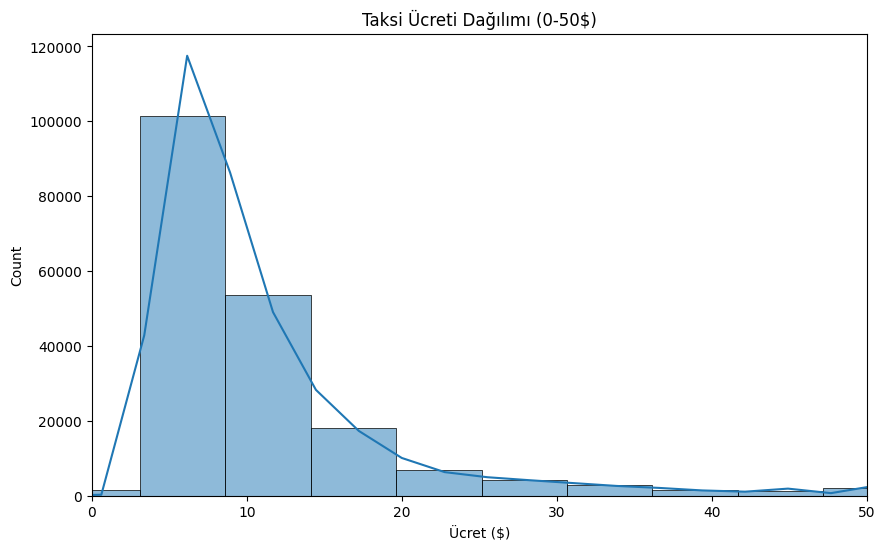

In [235]:
plt.figure(figsize=(10, 6))
# 100 bin dolar gibi uçuk değerlerin grafiği bozmaması için x eksenini sınırla
sns.histplot(df_clean['fare_amount'], bins=100, kde=True) 
plt.title('Taksi Ücreti Dağılımı (0-50$)')
plt.xlabel('Ücret ($)')
plt.xlim(0, 50) # Genellikle taksi ücretlerinin büyük kısmı 0-50$ arasındadır
plt.show()

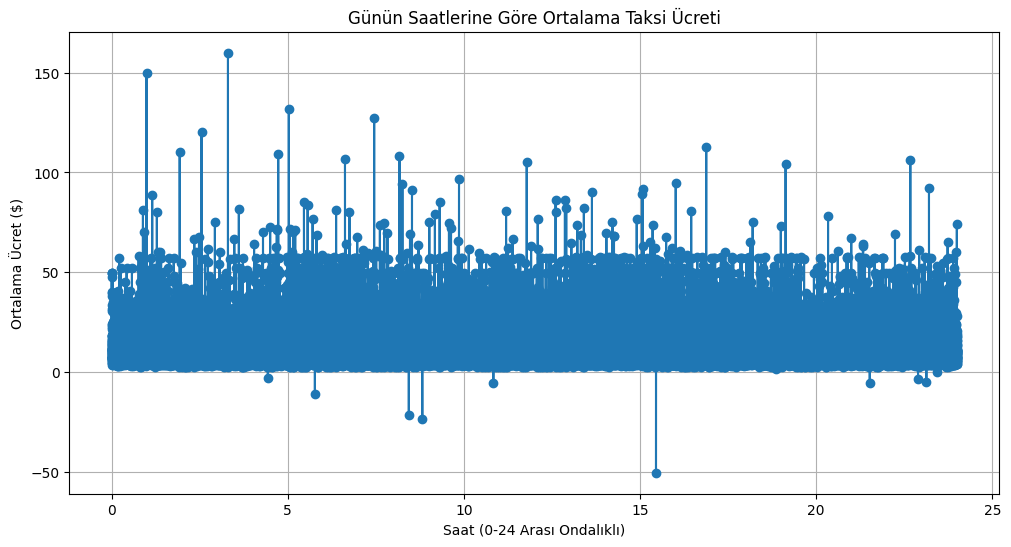

In [236]:
plt.figure(figsize=(12, 6))
# Saate göre ortalama ücreti hesapla ve çizdir
df_clean.groupby('hour_numeric')['fare_amount'].mean().plot(kind='line', marker='o')
plt.title('Günün Saatlerine Göre Ortalama Taksi Ücreti')
plt.xlabel('Saat (0-24 Arası Ondalıklı)')
plt.ylabel('Ortalama Ücret ($)')
plt.grid(True)
plt.show()

C:\Users\bilalakbulut\AppData\Local\Temp\ipykernel_2072\3781877968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_name'] = df['day_of_week'].map(day_map)


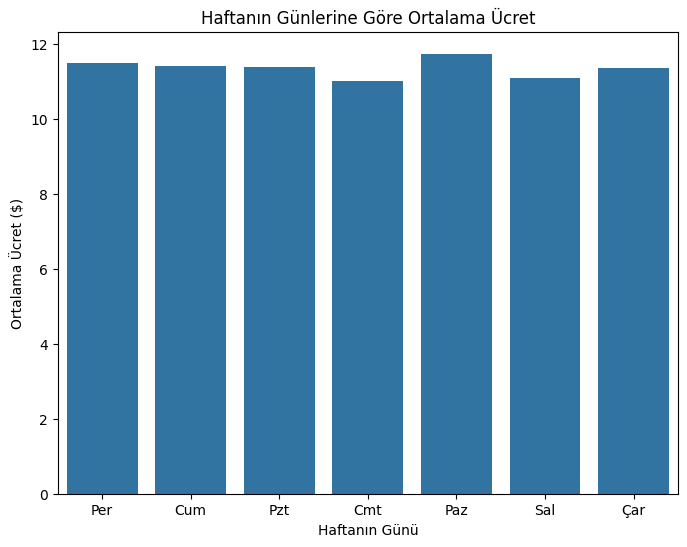

In [237]:
plt.figure(figsize=(8, 6))
# day_of_week kolonundaki sayıları gün isimleriyle değiştirebiliriz
day_map = {0: 'Pzt', 1: 'Sal', 2: 'Çar', 3: 'Per', 4: 'Cum', 5: 'Cmt', 6: 'Paz'}
df_clean['day_name'] = df['day_of_week'].map(day_map)

sns.barplot(x='day_name', y='fare_amount', data=df_clean, errorbar=None) # errorbar=None ortalama güven aralığını gizler
plt.title('Haftanın Günlerine Göre Ortalama Ücret')
plt.xlabel('Haftanın Günü')
plt.ylabel('Ortalama Ücret ($)')
plt.show()

In [238]:
df_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric,day_name
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333,Per
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222,Cum
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000,Pzt
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500,Cum
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333,Per


In [239]:
df_clean[df_clean["fare_amount"] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric,day_name
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,22,2,23.418611,Çar
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,20,5,2.997500,Cmt
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,1,23.128056,Sal
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,3,21.786111,Per
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,4,14.717222,Cum
89322,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,1,8.436111,Sal
92063,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,4,8.819444,Cum
98875,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,4,21.520556,Cum
104080,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,1,20.419444,Sal
139272,-6.90,2010-02-23 18:52:10+00:00,-73.988727,40.736445,-73.977622,40.750487,1,2010,2,23,1,18.869444,Sal


In [240]:
# Başlangıçtaki satır sayısını kaydedelim
initial_count = len(df_clean)

# fare_amount (Ücret) kolonu 0'dan büyük olan satırları seç
df_clean = df_clean[df_clean['fare_amount'] > 0]

# Silinen satır sayısını hesaplayalım
deleted_count = initial_count - len(df_clean)

print(f"Negatif veya sıfır ücret nedeniyle silinen satır sayısı: {deleted_count}")
print(f"Kalan temiz satır sayısı: {len(df_clean)}")

Negatif veya sıfır ücret nedeniyle silinen satır sayısı: 19
Kalan temiz satır sayısı: 195325


In [241]:
df_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric,day_name
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333,Per
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222,Cum
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000,Pzt
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500,Cum
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333,Per


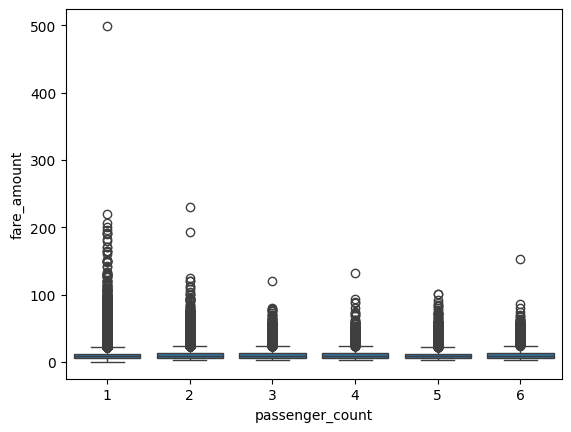

In [242]:
sns.boxplot(data=df_clean, x="passenger_count", y="fare_amount")
plt.show()

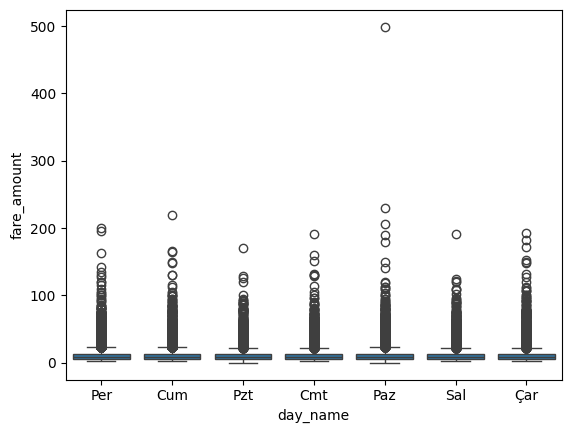

In [243]:
sns.boxplot(data=df_clean, x="day_name", y="fare_amount")
plt.show()

In [244]:
df_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
count,195325.000000,195325.000000,195325.000000,195325.000000,195325.000000,195325.000000,195325.000000,195325.000000,195325.000000,195325.00000,195325.000000
mean,11.352337,-73.929889,40.705424,-73.916900,40.688359,1.690070,2011.740817,6.283860,15.705829,3.04963,13.988353
std,9.804451,5.459207,5.436642,8.533590,4.001476,1.306077,1.861517,3.439405,8.687714,1.94682,6.521755
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000,2009.000000,1.000000,1.000000,0.00000,0.000000
25%,6.000000,-73.992269,40.736392,-73.991592,40.735267,1.000000,2010.000000,3.000000,8.000000,1.00000,9.404444
50%,8.500000,-73.982102,40.753277,-73.980522,40.753723,1.000000,2012.000000,6.000000,16.000000,3.00000,14.633333
75%,12.500000,-73.968318,40.767540,-73.965317,40.768320,2.000000,2013.000000,9.000000,23.000000,5.00000,19.516667
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,2015.000000,12.000000,31.000000,6.00000,23.999722


In [245]:
# Başlangıçtaki satır sayısını kaydet
initial_count = len(df_clean)

# Sadece Mantıksal Dünya Sınırları İçindeki Koordinatları Tut
df_clean = df_clean[
    # Enlem (Latitude) -90 ile +90 arasında olmalı
    (df_clean['dropoff_latitude'].between(-90, 90)) & 
    (df_clean['pickup_latitude'].between(-90, 90)) &
    
    # Boylam (Longitude) -180 ile +180 arasında olmalı
    (df_clean['dropoff_longitude'].between(-180, 180)) &
    (df_clean['pickup_longitude'].between(-180, 180))
]

silinen_satir_sayisi = initial_count - len(df_clean)
print(f"Dünya sınırları dışındaki geçersiz koordinatlar silindi. Silinen satır: {silinen_satir_sayisi}")

Dünya sınırları dışındaki geçersiz koordinatlar silindi. Silinen satır: 12


In [246]:
df_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
count,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000
mean,11.352293,-73.903511,40.687097,-73.902974,40.686502,1.690072,2011.740847,6.283852,15.705826,3.049577,13.988532
std,9.804556,2.780525,2.651661,2.771107,2.657019,1.306076,1.861556,3.439429,8.687809,1.946835,6.521714
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735270,1.000000,2010.000000,3.000000,8.000000,1.000000,9.405000
50%,8.500000,-73.982101,40.753277,-73.980522,40.753723,1.000000,2012.000000,6.000000,16.000000,3.000000,14.633333
75%,12.500000,-73.968318,40.767537,-73.965316,40.768320,2.000000,2013.000000,9.000000,23.000000,5.000000,19.516667
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,6.000000,23.999722


In [247]:
df_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric,day_name
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333,Per
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222,Cum
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000,Pzt
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500,Cum
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333,Per


In [248]:
df_clean = df_clean.drop("pickup_datetime", axis=1)
df_clean = df_clean.drop("day_name", axis=1)

In [249]:
df_clean.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19.868333
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20.082222
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21.750000
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8.372500
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17.783333


In [250]:
df_clean.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
count,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000,195313.000000
mean,11.352293,-73.903511,40.687097,-73.902974,40.686502,1.690072,2011.740847,6.283852,15.705826,3.049577,13.988532
std,9.804556,2.780525,2.651661,2.771107,2.657019,1.306076,1.861556,3.439429,8.687809,1.946835,6.521714
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735270,1.000000,2010.000000,3.000000,8.000000,1.000000,9.405000
50%,8.500000,-73.982101,40.753277,-73.980522,40.753723,1.000000,2012.000000,6.000000,16.000000,3.000000,14.633333
75%,12.500000,-73.968318,40.767537,-73.965316,40.768320,2.000000,2013.000000,9.000000,23.000000,5.000000,19.516667
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,6.000000,23.999722


In [251]:
df_clean[df_clean["fare_amount"] <= 2]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric
21658,0.01,-73.991692,40.770802,-73.991692,40.770824,1,2015,5,31,6,16.228056
149342,0.11,-73.997221,40.721345,-73.997252,40.721344,1,2010,3,7,6,19.195278
191228,0.01,-74.000523,40.725868,-73.956960,40.780855,1,2010,3,8,0,18.749167


In [252]:
# Başlangıç satır sayısını kaydet
initial_count = len(df_clean)

# Alt Eşik (Flooring): 2.50$'dan az olanları sil (Minimum başlangıç ücreti)
df_clean = df_clean[df_clean['fare_amount'] >= 2.50]

# Üst Eşik (Deletion): 100$'dan fazla olanları sil
df_clean = df_clean[df_clean['fare_amount'] <= 100.00]

# Sonuçları göster
deleted_count = initial_count - len(df_clean)
print(f"Mantıksal eşikler nedeniyle silinen toplam satır sayısı: {deleted_count}")
print(f"Eğitim için kalan temiz satır sayısı: {len(df_clean)}")

Mantıksal eşikler nedeniyle silinen toplam satır sayısı: 81
Eğitim için kalan temiz satır sayısı: 195232


In [253]:
df_clean[df_clean["fare_amount"] >100]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour_numeric


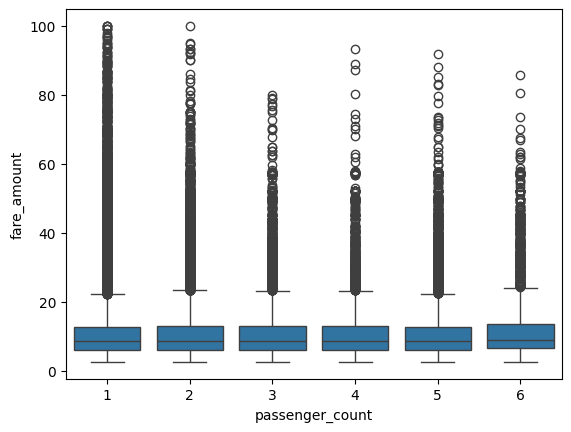

In [254]:
sns.boxplot(data=df_clean, x="passenger_count", y="fare_amount")
plt.show()

In [255]:
df_clean.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour_numeric         0
dtype: int64

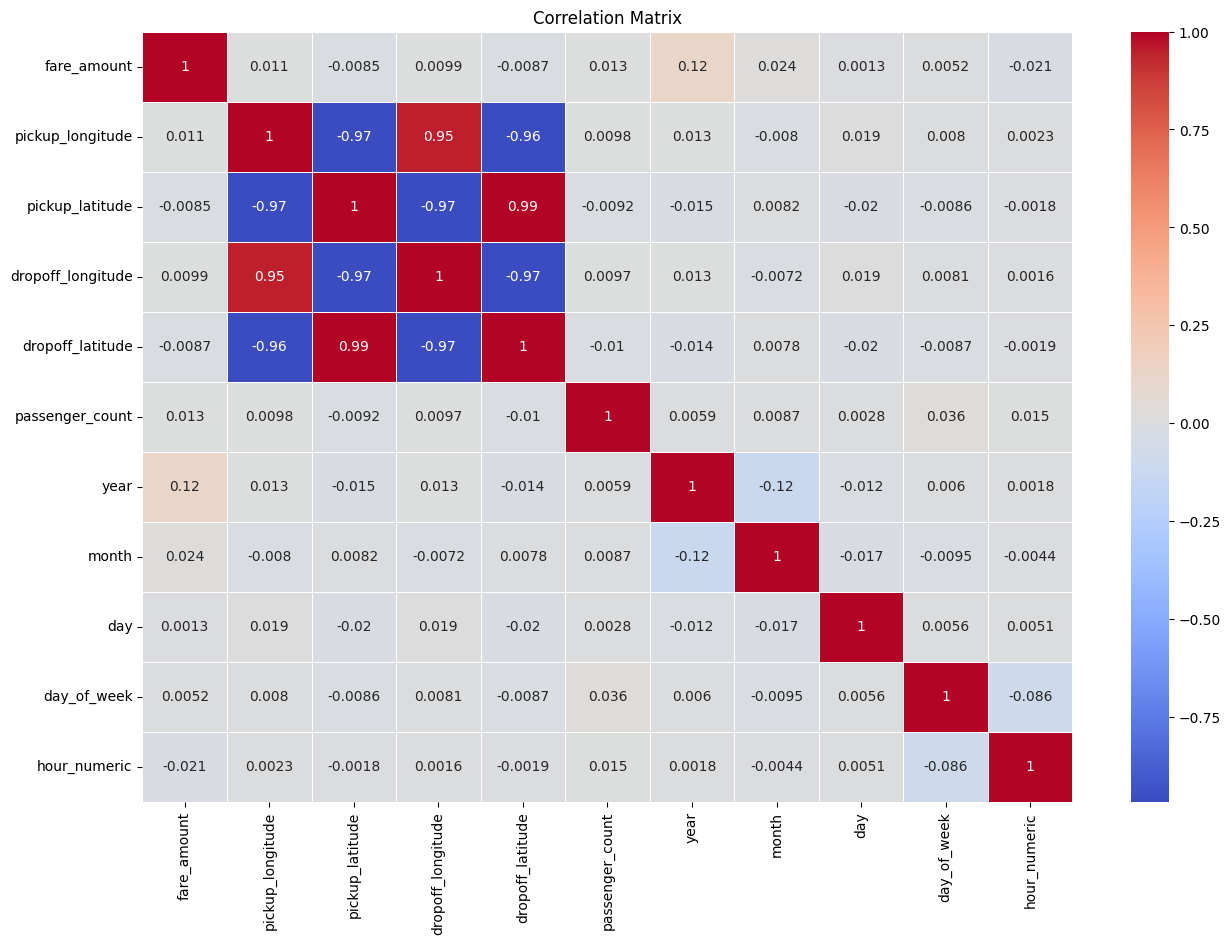

In [256]:
plt.figure(figsize=(15,10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [257]:
R = 6371 

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    İki enlem/boylam çifti arasındaki mesafeyi (km) Haversine formülü ile hesaplar.
    """
    # 1. Koordinatları radyan cinsine çevir (Haversine formülü radyan kullanır)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Enlem ve boylam farkları
    dphi = lat2 - lat1
    dlambda = lon2 - lon1
    
    # 2. Haversine formülünün çekirdeği (a)
    a = np.sin(dphi/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlambda/2)**2
    
    # 3. Yayın merkez açısı (c)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # 4. Yarıçap ile çarpım (Sonuç kilometre cinsinden)
    distance_km = R * c
    return distance_km

# ----------------------------------------------------------------------
# UYGULAMA
# ----------------------------------------------------------------------

# df_clean kolonlarını fonksiyona uygula
df_clean['distance_km'] = haversine_distance(
    df_clean['pickup_latitude'], 
    df_clean['pickup_longitude'],
    df_clean['dropoff_latitude'], 
    df_clean['dropoff_longitude']
)

print("distance_km kolonu başarıyla eklendi.")

distance_km kolonu başarıyla eklendi.


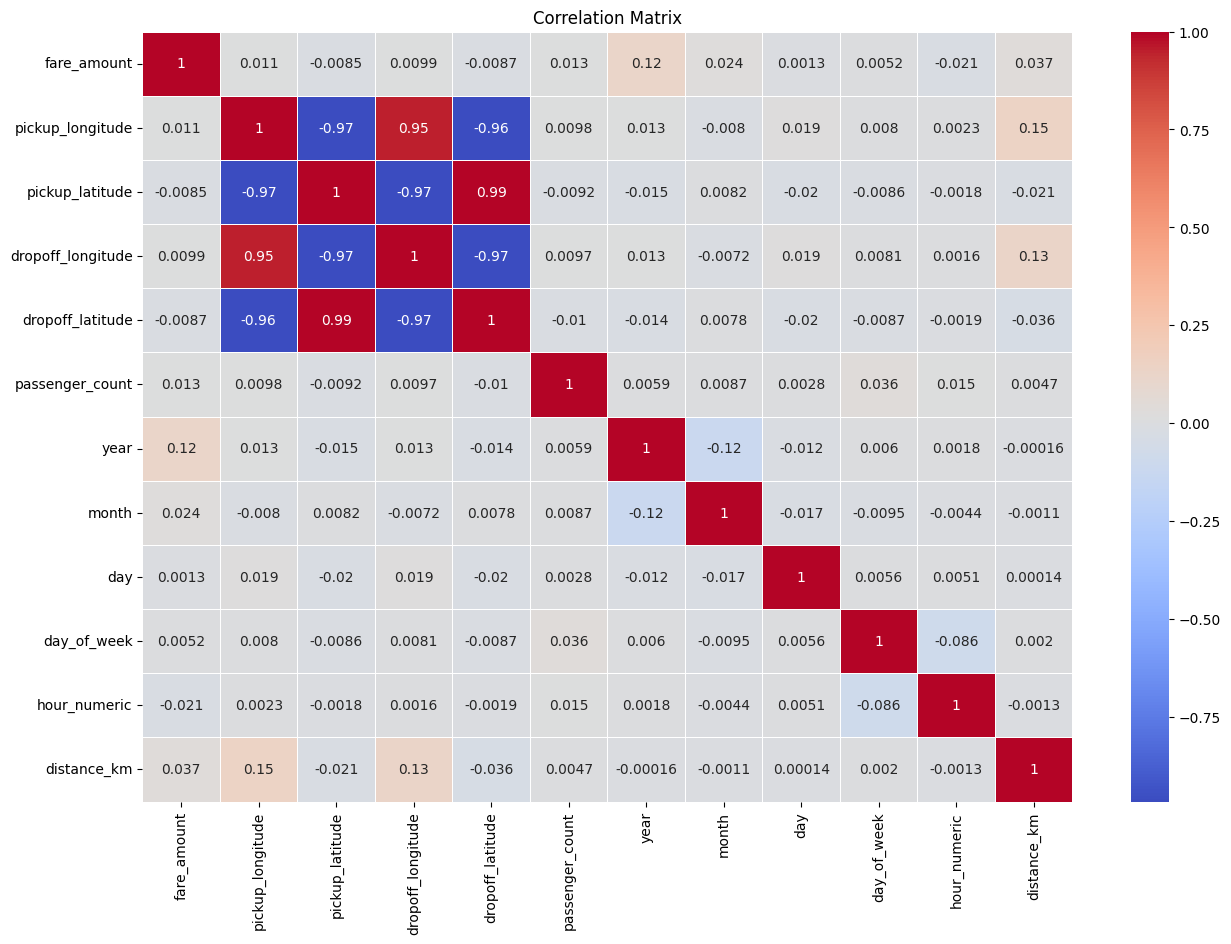

In [258]:
plt.figure(figsize=(15,10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [259]:
# Silinecek ham koordinat kolonlarının listesi
coordinate_cols_to_drop = [
    'pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude'
]

# df_clean veri setinden bu kolonları kalıcı olarak at
df_clean = df_clean.drop(columns=coordinate_cols_to_drop) 

print("Ham koordinat kolonları başarıyla silindi.")
print(f"df_clean'in son kolonları: {df_clean.columns.tolist()}")

Ham koordinat kolonları başarıyla silindi.
df_clean'in son kolonları: ['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_of_week', 'hour_numeric', 'distance_km']


In [260]:
df_clean.head()

,fare_amount,passenger_count,year,month,day,day_of_week,hour_numeric,distance_km
0,7.5,1,2015,5,7,3,19.868333,1.683323
1,7.7,1,2009,7,17,4,20.082222,2.457590
2,12.9,1,2009,8,24,0,21.750000,5.036377
3,5.3,3,2009,6,26,4,8.372500,1.661683
4,16.0,5,2014,8,28,3,17.783333,4.475450


In [261]:
#dependent & independent feature 
X = df_clean.drop('fare_amount', axis= 1)
y = df_clean['fare_amount']

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

In [274]:
import warnings
warnings.filterwarnings('ignore') # Uyarıları sustur

# 1. Modelleri Tanımlama
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=50),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, n_jobs=-1),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1, n_jobs=-1)
}

results = {}

print("Modeller Eğitiliyor ve Test Ediliyor...")

# 2. Döngü ile Tüm Modelleri Eğitme ve Değerlendirme
for name, model in models.items():
    
    # Modeli Eğitme
    model.fit(X_train, y_train)
    
    # Tahmin Yapma
    y_pred = model.predict(X_test)
    
    # Metrikleri Hesaplama
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Sonuçları kaydetme
    results[name] = {'RMSE': rmse, 'R2_Score': r2, 'MAE': mae}
    
    print(f"✅ {name} tamamlandı.")

# 3. Sonuçları DataFrame'de Özetleme
results_df = pd.DataFrame(results).T.sort_values(by='RMSE', ascending=True)

print("\n" + "="*50)
print("             MODELLERİN PERFORMANS ÖZETİ")
print("="*50)
print(results_df)

Modeller Eğitiliyor ve Test Ediliyor...
✅ Decision Tree tamamlandı.
✅ Random Forest tamamlandı.
✅ KNeighbors tamamlandı.
✅ AdaBoost tamamlandı.
✅ XGBoost tamamlandı.
✅ LightGBM tamamlandı.

             MODELLERİN PERFORMANS ÖZETİ
                   RMSE  R2_Score       MAE
LightGBM       4.058127  0.814232  2.046320
XGBoost        4.083646  0.811889  2.054091
Random Forest  4.149559  0.805767  2.172766
Decision Tree  4.248364  0.796407  2.124564
AdaBoost       5.821103  0.617766  3.914156
KNeighbors     9.604329 -0.040526  5.973461


In [281]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, -1]
}

lgbm_tuned = GridSearchCV(
    LGBMRegressor(random_state=42), 
    param_grid, 
    scoring='neg_root_mean_squared_error', 
    cv=3, 
    n_jobs=-1
)

lgbm_tuned.fit(X_train, y_train) 


,estimator,LGBMRegressor(random_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [5, 10, ...], 'n_estimators': [200, 500]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [283]:
best_lgbm_model = lgbm_tuned.best_estimator_

# 2. Test seti üzerinde tahmin yap
y_pred_best = best_lgbm_model.predict(X_test)

# 3. R2 Skorunu hesapla
r2_best = r2_score(y_test, y_pred_best)

print("\n" + "="*50)
print("     OPTİMİZASYON SONRASI TEST SETİ NİHAİ METRİKLERİ")
print("="*50)
print(f"En İyi Parametrelerle RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")
print(f"Nihai R-Kare (R²) Skoru: {r2_best:.4f}")


     OPTİMİZASYON SONRASI TEST SETİ NİHAİ METRİKLERİ
En İyi Parametrelerle RMSE: 4.0559
Nihai R-Kare (R²) Skoru: 0.8144
